# 图像处理+180776+胡欣毅(Python版)

## 1. 题目清单（120/100）

0. 熟悉图像处理软件、平台，实现图像的读取与显示（例）
1. 【个人作业】课堂上的边缘提取算法的实现、并可视化（20/100）
2. 【小组作业】自行查找文献了解SIFT、SURF算法，并介绍（20/100）；
3. 【小组作业】实现SIFT算法（30/100）；
4. 【小组作业】实现SURF算法（附加题20）；
5. 【小组作业】测试SIFT算法，并可视化（10/100）；
6. 【小组作业】准备10页左右ppt，包括上述内容，并准备课堂抽查报告（20/100）。



## 2. 解答 

### 2.1 第1题

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

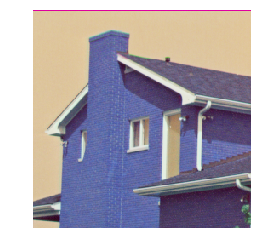

In [2]:
im = cv2.imread('../data/4.1.05.tiff')
im.shape
plt.imshow(im)
plt.axis("off")#去除坐标轴
plt.show()

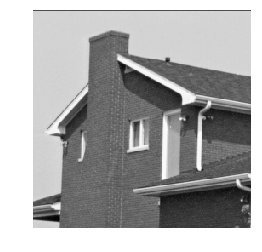

In [3]:
gray = cv2.cvtColor(im , cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.axis("off")
plt.show()

## 一阶算子

#### Roberts 交叉梯度算子
$$ \left[ \begin{array}{cc}{1} & {0} \\ {0} & {-1}\end{array}\right]　\quad   \left[ \begin{array}{cc}{0} & {-1} \\ {1} & {0}\end{array}\right]   $$

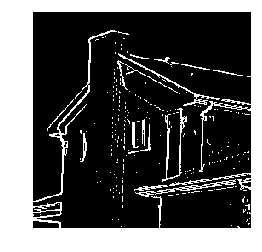

In [4]:
# Roberts
Ker_x = np.array([[1,0],[0,-1]])
Ker_y = np.array([ [0,-1],[1,0]])                 
grad_x = cv2.filter2D(gray,  -1 , Ker_x )
grad_y = cv2.filter2D(gray,  -1 , Ker_y )
grad = np.abs(grad_x)  + np.abs(grad_y)  
grad = (grad > 25)*255
plt.imshow(grad,cmap='gray')
plt.axis("off")
plt.show()

####  Prewitt 算子 
$$ \left[ \begin{array}{ccc}{-1} & {-1} & {-1} \\ {0} & {0} & {0} \\ {1} & {1} & {1}\end{array}\right] \quad 
\left[ \begin{array}{rrr}{-1} & {0} & {1} \\ {-1} & {0} & {1} \\ {-1} & {0} & {1}\end{array}\right]  $$

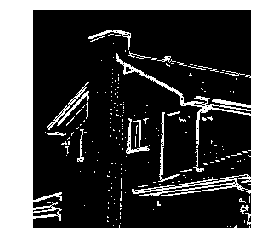

In [5]:
# Prewwitt
Ker_x = np.array([ [-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
Ker_y = np.array([ [1, 1, 1], [0, 0, 0], [-1, -1, -1]])      

grad_x = cv2.filter2D(gray,  -1 , Ker_x )
grad_y = cv2.filter2D(gray,  -1 , Ker_y )
grad = abs(grad_x)  + abs(grad_y)  
grad = (grad > 60)*255
plt.imshow(grad,cmap='gray')
plt.axis("off")
plt.show()

####  Sobel算子
$$ \left[ \begin{array}{ccc}{-1} & {-2} & {-1} \\ {0} & {0} & {0} \\ {1} & {2} & {1}\end{array}\right] \quad \left[ \begin{array}{rrr}{-1} & {0} & {1} \\ {-2} & {0} & {2} \\ {-1} & {0} & {1}\end{array}\right]  $$

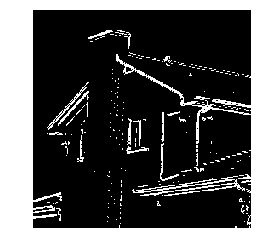

In [6]:
# Sobel 核化滤波器
Ker_x = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Ker_y = np.array([ [1, 2, 1], [0, 0, 0], [-1, -2, -1]])  

grad_x = cv2.filter2D(gray,  -1 , Ker_x )
grad_y = cv2.filter2D(gray,  -1 , Ker_y )
grad = abs(grad_x)  + abs(grad_y)  
grad = (grad > 100)*255
plt.imshow(grad,cmap='gray')
plt.axis("off")
plt.show()

## 二阶算子

####  Laplace算子
$$ \left[ \begin{array}{ccc}{0} & {1} & {0} \\ {1} & {-4} & {1} \\ {0} & {1} & {0}\end{array}\right] \quad
\left[ \begin{array}{ccc}{1} & {1} & {1} \\ {1} & {-8} & {1} \\ {1} & {1} & {1}\end{array}\right]  \quad
\left[ \begin{array}{ccc}{1} & {4} & {1} \\ {4} & {-20} & {4} \\ {1} & {4} & {1}\end{array}\right]  $$

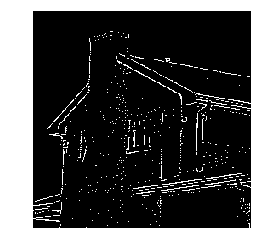

In [7]:
# Laplace算子
suanzi1 = np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

# Laplace算子
suanzi2 = np.array([[1, 1, 1],
                    [1,-8, 1],
                    [1, 1, 1]])

grad = cv2.filter2D(gray,  -1 , suanzi2 )
# 取二阶导数较大的点替代二阶导数接近 0 的位置
grad = (np.abs(grad) > 90) * 255
plt.imshow(grad,cmap='gray')
plt.axis("off")
plt.show()

####  LOG算子
$$ \left[ \begin{array}{ccccc} 0&0&1&0&0\\ 0&1&2&1&0\\1&2& -16 &2&1\\     0&1&2&1&0\\  0&0&1&0&0 
\end{array} 
\right] $$

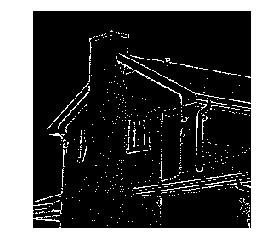

In [8]:
Ker = np.array([[0, 0,1,0, 0], 
                [0,1, 2,1,0], 
                [1, 2, -16,2,1], 
                [0,1, 2,1,0],
                [0, 0,1,0, 0] ])
grad = cv2.filter2D(gray,  -1 , Ker )
# 取二阶导数较大的点替代二阶导数接近 0 的位置
grad = (np.abs(grad) > 165) * 255
plt.imshow(grad,cmap='gray')
plt.axis("off")
plt.show()

Canny算法

$$
\frac{\partial^2 }{\partial n^2}(G_{\sigma }*f)=0
$$

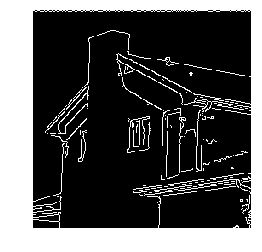

In [9]:
# 库函数版
canny_filter = cv2.Canny(gray,80, 180, 3)
plt.imshow(canny_filter,cmap='gray')
plt.axis("off")
plt.show()

In [10]:
# 自编函数版
def my_canny(src):   
    # 高斯低通滤波器
    gass = cv2.GaussianBlur(src, (3,3), 0)
    # canny 核 四个角度 一阶
    ker = np.zeros((3,3,4))
    ker[...,0] = np.array([[0,0,0],
                           [0,-1,1],
                           [0,0,0]])
    ker[...,1]  = np.array([[0,0,1],
                            [0,-1,0],
                            [0,0,0]])
    ker[...,2]  = np.array([[0,1,0],
                            [0,-1,0],
                            [0,0,0]])
    ker[...,3]  = np.array([[1,0,0],
                            [0,-1,0],
                            [0,0,0]])
    # 核 四个角度 二阶
    ker2 = np.zeros((3,3,4))
    ker2[...,0] = np.array([[0, 0,0],
                            [1,-2,1],
                            [0, 0,0]])
    ker2[...,1]  = np.array([[0, 0,1],
                             [0,-2,0],
                             [1, 0,0]])
    ker2[...,2]  = np.array([[0, 1,0],
                             [0,-2,0],
                             [0, 1,0]])
    ker2[...,3]  = np.array([[1, 0,0],
                             [0,-2,0],
                             [0, 0,1]])
    
    # 四个角度的差分
    d = np.zeros(src.shape +(4,))
    dd = np.zeros(src.shape +(4,))
    for i in range(4):
        d[...,i] = cv2.filter2D(src, -1 , ker[...,i])
        dd[...,i] = cv2.filter2D(src, -1 , ker2[...,i])
    
    n_f = np.ones_like(src)
    for row in range(src.shape[0]):
        for col in range(src.shape[1]):
            # 法向
            n = np.where( np.abs(d[row,col,:]) ==\
                         np.max(np.abs(d[row,col,:]) ))[0][0]

            n_f[row,col] = dd[row,col,n]
    return n_f

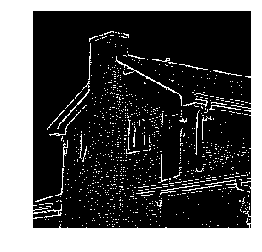

In [11]:
canny_out = my_canny(gray)
# 取二阶导数较大的点替代二阶导数接近 0 的位置
canny_out = (canny_out > 25) * 255
plt.imshow(canny_out,cmap='gray')
plt.axis("off")
plt.show()

### 2.2 第2题 && 第六题 见slides报告

### 2.3 第3题 && 第5题

In [12]:
def rotate(image, angle, center=None, scale=1.0):
    ##　h,w 尺寸
    (h, w) = image.shape[:2]
    if center is None:
        center = (w // 2, h // 2)
 
    M = cv2.getRotationMatrix2D(center, angle, scale)
    # print(M) ## 旋转阵　＋　旋转中心
    # 旋转
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

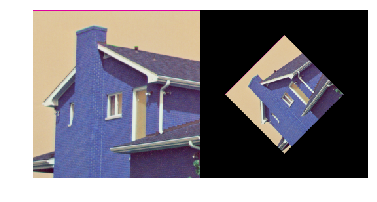

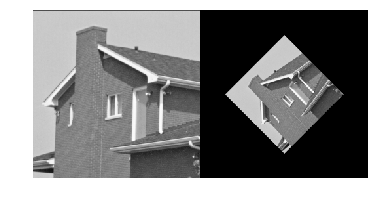

In [13]:
#   参数设定

image = "../data/4.1.05.tiff"

model = cv2.xfeatures2d.SIFT_create()
# model = cv2.xfeatures2d.SURF_create()

img1 = cv2.imread(image)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
kp1, des1 = model.detectAndCompute(img1,None) 
#des是描述子

img2  = rotate(img1, 45,scale = .5 ) 
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kp2, des2 = model.detectAndCompute(img2,None)

#水平拼接
together = np.hstack((img1, img2)) 
# cv2.imshow('src',together )
plt.imshow(together,cmap='gray')
plt.axis("off")
plt.show()

together = np.hstack((gray1, gray2)) 
# cv2.imshow('gray',together )
plt.imshow(together,cmap='gray')
plt.axis("off")
plt.show()

img3 = cv2.drawKeypoints(img1,kp1,img1,color=(255,0,255))
img4 = cv2.drawKeypoints(img2,kp2,img2,color=(255,0,255))

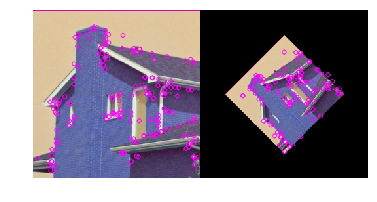

In [14]:
together = np.hstack((img3, img4)) 
# cv2.imshow("point", together)
plt.imshow(together,cmap='gray')
plt.axis("off")
plt.show()

In [15]:
# FLANN 参数设计
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [16]:
matches = flann.knnMatch(des1,des2,k=2)
matchesMask = [[0,0] for i in range(len(matches)) ]

good = []
for m,n in matches:
    if m.distance < 0.7 * n.distance:
        good.append([m])

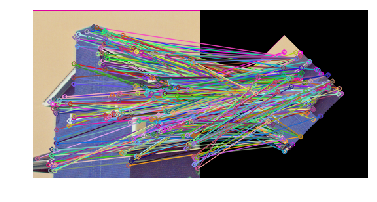

In [17]:
img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,flags=2)

# cv2.imshow("FLANN", img5)
plt.imshow(img5,cmap='gray')
plt.axis("off")
plt.show()

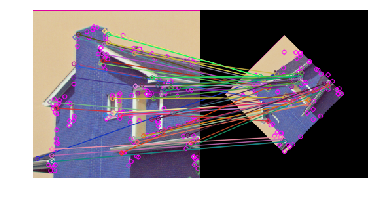

In [18]:
img6 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

# cv2.imshow("FLANN", img6)
plt.imshow(img6,cmap='gray')
plt.axis("off")
plt.show()

### 2.4 第4题

将上述的SIFT算法导入改为SURF即可

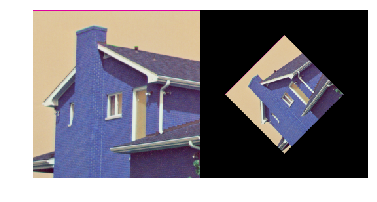

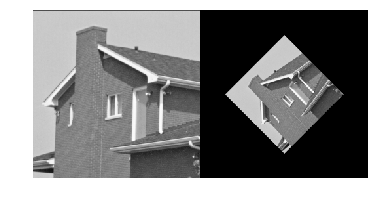

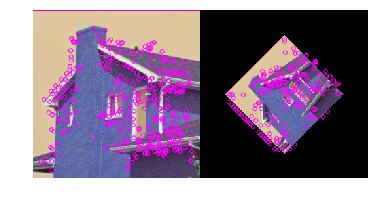

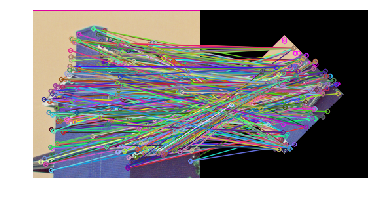

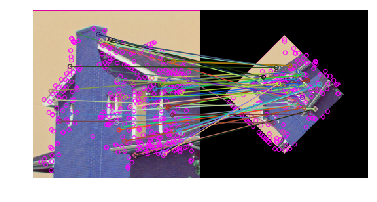

In [19]:
#   参数设定

image = "../data/4.1.05.tiff"

model = cv2.xfeatures2d.SURF_create()

img1 = cv2.imread(image)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
kp1, des1 = model.detectAndCompute(img1,None) 
#des是描述子

img2  = rotate(img1, 45,scale = .5 ) 
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kp2, des2 = model.detectAndCompute(img2,None)

#水平拼接
together = np.hstack((img1, img2)) 
# cv2.imshow('src',together )
plt.imshow(together,cmap='gray')
plt.axis("off")
plt.show()

together = np.hstack((gray1, gray2)) 
# cv2.imshow('gray',together )
plt.imshow(together,cmap='gray')
plt.axis("off")
plt.show()

img3 = cv2.drawKeypoints(img1,kp1,img1,color=(255,0,255))
img4 = cv2.drawKeypoints(img2,kp2,img2,color=(255,0,255))
together = np.hstack((img3, img4)) 
# cv2.imshow("point", together)
plt.imshow(together,cmap='gray')
plt.axis("off")
plt.show()

matches = flann.knnMatch(des1,des2,k=2)

matchesMask = [[0,0] for i in range(len(matches)) ]

good = []
for m,n in matches:
    if m.distance < 0.7 * n.distance:
        good.append([m])

img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,flags=2)
plt.imshow(img5,cmap='gray')
plt.axis("off")
plt.show()

img6 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.imshow(img6,cmap='gray')
plt.axis("off")
plt.show()

# 图像处理+180776+胡欣毅(C++版)

## 2. 个人作业 

[c++](c++/hxy.cpp)

得到的图像效果与Python类似

## 2. 小组作业 

[c++](team_work/c++/team1.cpp)